<a href="https://colab.research.google.com/github/vinit0108/AUC-ROC-Curve---ML/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Data Science - HW 11
##### Copyright 2021, Jeffrey Stanton, Jeffrey Saltz, Christopher Dunham, and Jasmina Tacheva

In [ ]:
# Enter your name here: Vinit Horakeri

### Attribution statement: (choose only one and delete the rest)

In [ ]:
# 1. I did this homework by myself, with help from the book and the professor.


In [1]:
install.packages("tidyverse")
install.packages("quanteda")
install.packages("quanteda.textplots")
install.packages("quanteda.textstats")
install.packages("syuzhet")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ISOcodes’, ‘fastmatch’, ‘RcppParallel’, ‘SnowballC’, ‘stopwords’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘extrafontdb’, ‘Rttf2pt1’, ‘statnet.common’, ‘extrafont’, ‘ggrepel’, ‘sna’, ‘igraph’, ‘network’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nsyllable’, ‘proxyC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘slam’, ‘textshape’, ‘NLP’, ‘zoo’, ‘dtt’




**Text mining** plays an important role in many industries because of the prevalence of text in the interactions between customers and company representatives. Even when the customer interaction is by speech, rather than by chat or email, speech to text algorithms have gotten so good that transcriptions of these spoken word interactions are often available. To an increasing extent, a data scientist needs to be able to wield tools that turn a body of text into actionable insights. In this homework, we explore a real **City of Syracuse dataset** using the **quanteda** and **quanteda.textplots** packages. Make sure to install the **quanteda** and **quanteda.textplots** packages before following the steps below:<br>

## Part 1: Load and visualize the data file  
A.	Take a look at this article: https://samedelstein.medium.com/snowplow-naming-contest-data-2dcd38272caf and write a comment in your R script, briefly describing what it is about.<br>

In [ ]:
# This article is about a naming contest for snowplows in Syracuse.
# After the winning names were announced, some people felt there were other names that would have been better.

# As a result, all of the submissions' data was gathered and analyzed.

B.	Read the data from the following URL into a dataframe called **df**:
https://intro-datascience.s3.us-east-2.amazonaws.com/snowplownames.csv

In [ ]:
library(tidyverse)
df <- read_csv("https://intro-datascience.s3.us-east-2.amazonaws.com/snowplownames.csv")


C.	Inspect the **df** dataframe – which column contains an explanation of the meaning of each submitted snowplow name? 

In [3]:
head(df)
str(df)
# The "meaning" column explains what the names of snowplows mean.

submission_number,submitter_name_anonymized,snowplow_name,meaning,winning_name
<dbl>,<chr>,<chr>,<chr>,<lgl>
1,kjlt9cua,rudolph,The red nose cuts through any storm.,FALSE
2,KXKaabXN,salt life,"We may not be near the ocean like everyone else with the stickers that say Salt Life, but we have plenty of salt!",FALSE
3,kjlt9cua,blizzard,This plow can handle any storm.,FALSE
4,Rv9sODqp,butter,It's amazing how the snow plows through snow like butter!,FALSE
5,zzcc5FDn,santa's 10 reindeer,They can deliver through the bad weather and snow.,FALSE
6,wOrKO7XI,plowy mcplowface,It would be a great name,FALSE


spec_tbl_df [1,907 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ submission_number        : num [1:1907] 1 2 3 4 5 6 7 8 9 10 ...
 $ submitter_name_anonymized: chr [1:1907] "kjlt9cua" "KXKaabXN" "kjlt9cua" "Rv9sODqp" ...
 $ snowplow_name            : chr [1:1907] "rudolph" "salt life" "blizzard" "butter" ...
 $ meaning                  : chr [1:1907] "The red nose cuts through any storm." "We may not be near the ocean like everyone else with the stickers that say Salt Life, but we have plenty of salt!" "This plow can handle any storm." "It's amazing how the snow plows through snow like butter!" ...
 $ winning_name             : logi [1:1907] FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   submission_number = col_double(),
  ..   submitter_name_anonymized = col_character(),
  ..   snowplow_name = col_character(),
  ..   meaning = col_character(),
  ..   winning_name = col_logical()
  .. )
 - attr(*, "problems")=<externalptr> 


D. Transform that column into a **document-feature matrix**, using the **corpus()**, **tokens(), tokens_select()**, and **dfm()** functions from the quanteda package. Do not forget to **remove stop words**.

In [ ]:
#install.packages("quanteda")
library(quanteda)

snowPlowCorpus <- corpus(df$meaning, docnames=df$submission_number)
# creating a corpus of snow plow name meanings and using each "submission number" as a document
# by invoking the internal quanteda tokenizer, a token object is created.
# It uses "space" as a delimiter to separate words in the meaning column.

# Based on the submission number, # toks will contain a list of terms from the meaning mapped to each document.
toks <- tokens(snowPlowCorpus, remove_punct=TRUE)
#  stop words removal
toks_nostop <- tokens_select(toks, 
                             pattern = stopwords("en"), 
                             selection = "remove")
#generating a document feature matrix from a corpus of documents
snowPlowDFM <- dfm(toks_nostop, tolower = TRUE ) # Converts tokens to lower case as well.

E.	Plot a **word cloud** where a word is only represented if it appears **at least 2 times** in the corpus. **Hint:** use **textplot_wordcloud()** from the quanteda.textplots package:

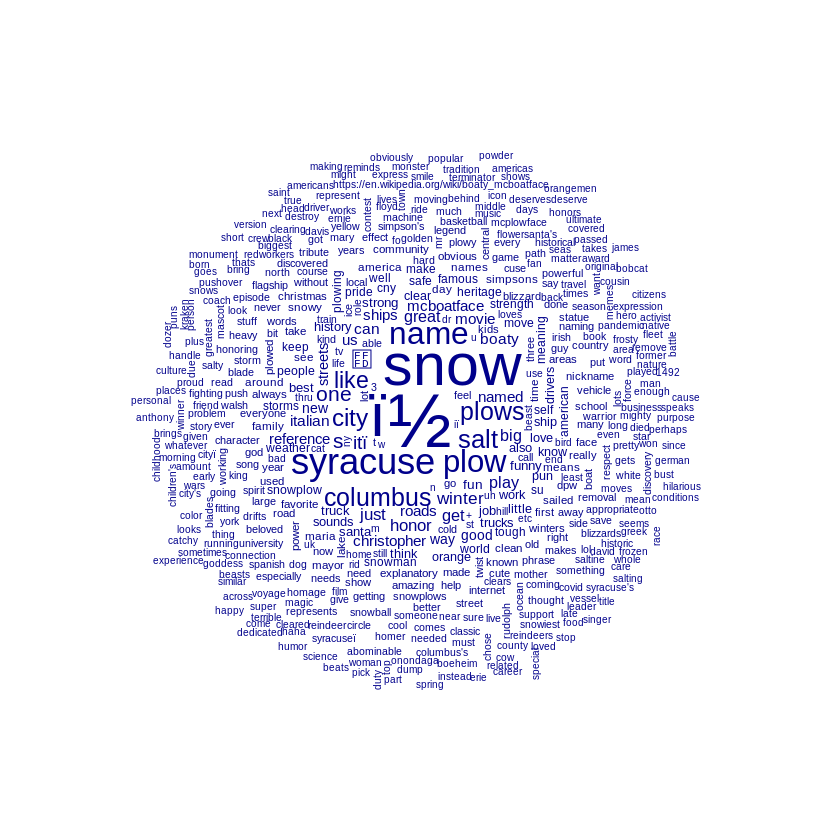

In [5]:
#install.packages("quanteda.textplots")
library(quanteda.textplots)
# The sizes of the feature labels are proportionate to their numerical values in 

# feature labels are plotted with their sizes corresponding to their numerical values in
textplot_wordcloud(snowPlowDFM, min_count = 2) # creating the word cloud with all the words having atleast count of 2

F.	Next, **increase the minimum count to 10**. What happens to the word cloud? **Explain in a comment**. 

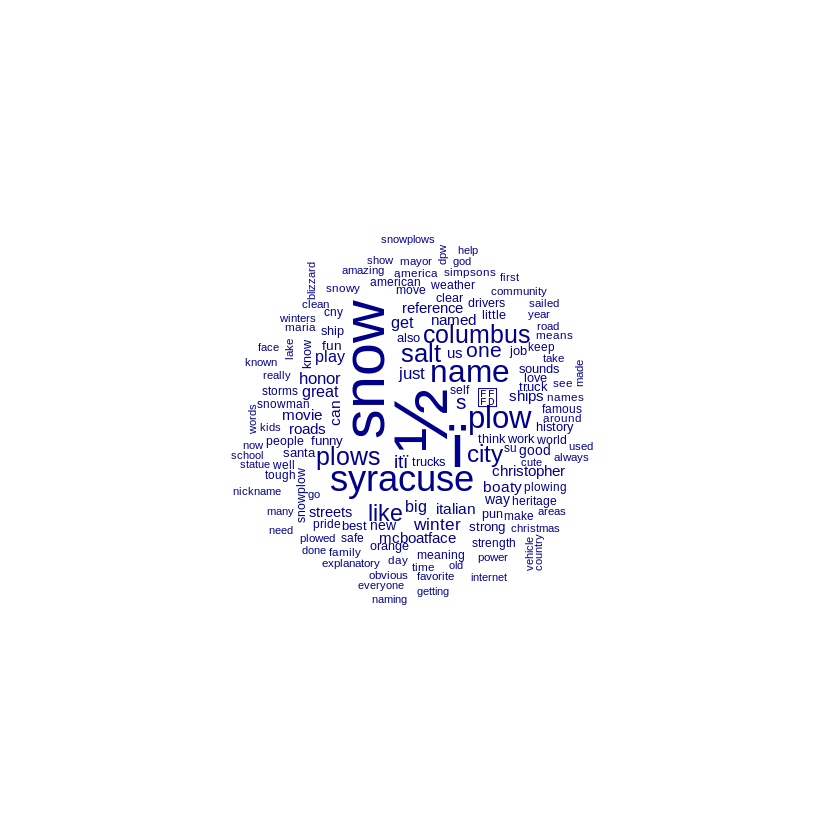

In [6]:
# # generates a word cloud containing all words that appeared at least 10 times.
textplot_wordcloud(snowPlowDFM, min_count = 10)


# When compared to the previous word cloud, this one has less words.
# As the threshold (i.e.,min count) was raised, the word cloud decreased.

G.	What are the top 10 words in the word cloud?

**Hint**: use textstat_frequency in the quanteda.textstats package

In [7]:
#install.packages("quanteda.textstats")
library(quanteda.textstats)
library(quanteda)

textstat_frequency(x=snowPlowDFM, n=10)

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,½,432,1,143,all
2,ï,336,2,147,all
3,snow,321,3,292,all
4,syracuse,174,4,164,all
5,name,143,5,137,all
6,plow,140,6,130,all
7,salt,104,7,83,all
8,plows,100,8,98,all
9,columbus,100,8,96,all


H.	Explain in a comment what you observed in the sorted list of word counts. 

In [ ]:
# There are columns for feature, frequency, rank, docfreq, and group in this sorted list of word counts.
# feature: a one-of-a-kind list of words derived from the corpus, i.e., the meaning column


#The number of times each word appeared in the meaning column is indicated by the # frequency.
# rank: the frequency of words is ranked. For example, the most commonly used terms are "1/2" and "i." # is the most often used word and so has the highest frequency rank.


# docfreq: it displays the number of distinct documents in which the word appeared. # group: If features have been grouped, we will see all counts, ranks, and # document frequencies inside that group.

## Part 2: Analyze the sentiment of the descriptions

###Match the review words with positive and negative words

I.	Read in the list of positive words (using the scan() function), and output the first 5 words in the list. 

https://intro-datascience.s3.us-east-2.amazonaws.com/positive-words.txt
<br>

There should be 2006 positive words words, so you may need to clean up these lists a bit. 

In [8]:
# positive word file location
URL <- "https://intro-datascience.s3.us-east-2.amazonaws.com/positive-words.txt"
#reading positive word file
posWords <- scan(URL, what="character", sep='\n')
#discard header


posWords <- posWords[-1:-34]
length(posWords)

[1] 2006

J. Do the same for the  the negative words list (there are 4783 negative words): <br>
<br>
https://intro-datascience.s3.us-east-2.amazonaws.com/negative-words.txt <br>



In [9]:
#negative word file location
URL <- "https://intro-datascience.s3.us-east-2.amazonaws.com/negative-words.txt"

# reading the negative word file
negWords <- scan(URL, what = "character", sep='\n')
# header discard


negWords <- negWords[-1:-34]
length(negWords)

[1] 4783

J.	Using **dfm_match()** with the dfm and the positive word file you read in, and then **textstat_frequency()**, output the 10 most frequent positive words

In [10]:
# posWords will be used to filter positive words from snowPlowDFM. 
#Positive # characteristics # and corresponding frequency, rank, 
#and docfreq of positive words present in the document will be included in the output.

posDFM <- dfm_match(snowPlowDFM, posWords)
#count of the  positive words
posFreq <- textstat_frequency(posDFM)

glimpse(posFreq)
posFreq %>% slice(1:10)

Rows: 211
Columns: 5
$ feature   <chr> "like", "honor", "great", "good", "fun", "strong", "best", "…
$ frequency <dbl> 88, 47, 43, 28, 27, 25, 23, 21, 21, 19, 16, 16, 16, 15, 15, …
$ rank      <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 11, 11, 14, 14, 16, 16, 1…
$ docfreq   <dbl> 85, 47, 43, 28, 24, 25, 22, 21, 21, 19, 16, 16, 16, 15, 15, …
$ group     <chr> "all", "all", "all", "all", "all", "all", "all", "all", "all…


,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,like,88,1,85,all
2,honor,47,2,47,all
3,great,43,3,43,all
4,good,28,4,28,all
5,fun,27,5,24,all
6,strong,25,6,25,all
7,best,23,7,22,all
8,love,21,8,21,all
9,work,21,8,21,all


M.	Use R to print out the total number of positive words in the name explanation.

In [11]:
nrow(posFreq)


[1] 211

N.	Repeat that process for the negative words you matched. Which negative words were in the name explanation variable, and what is their total number?

In [12]:
# will use negWords to filter negative terms from snowPlowDFM. Negative # characteristics 

# and corresponding frequency, rank, and docfreq of negative words found in the document will be included in the output.
negDFM <- dfm_match(snowPlowDFM, negWords)
#count of the negative words

negFreq <- textstat_frequency(negDFM)
negFreq %>% slice(1:10)

nrow(negFreq)


,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,funny,25,1,25,all
2,cold,8,2,8,all
3,twist,8,2,8,all
4,hard,7,4,7,all
5,abominable,6,5,6,all
6,problem,6,5,6,all
7,bad,5,7,5,all
8,destroy,5,7,5,all
9,died,5,7,5,all


[1] 148

O.	Write a comment describing what you found after exploring the positive and negative word lists. Which group is more common in this dataset?

In [ ]:
#The total number of positive words outnumbers the number of negative words.
#The names of snow plows have a more positive connotation.

X. Complete the function below, so that it returns a sentiment score (number of positive words - number of negative words)

In [13]:
doMySentiment <- function(posWords, negWords, stringToAnalyze ) {
  sentimentScore <- length(posWords) - length(negWords)

  
  return(sentimentScore)
}

X. Test your function with the string "This book is horrible"

In [14]:
doMySentiment(posWords, negWords, "This book is horrible")


[1] -2777

Use the syuzhet package, to calculate the sentiment of the same phrase ("This book is horrible"), using syuzhet's **get_sentiment()** function, using the afinn method. In AFINN, words are scored as integers from -5 to +5:


In [15]:
#install.packages("syuzhet")
library(syuzhet)
get_sentiment("This book is horrible", method="afinn")

[1] -3